<a href="https://colab.research.google.com/github/Rogerio-mack/IMT_CD_2024/blob/main/IMT_pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# Pre-Processing

## imports

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.formula.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


# Pré-Processing

Dentre outras operações sobre os dados podemos destacar:

0. Discretização*
1. Imputação de Valores Ausentes
2. Encoding Variáveis Categóricas
3. Normalização





## 1. Imputação de Valores Ausentes

Ou exclusão.

In [15]:
print(df.isnull().sum())
df = df.dropna().reset_index(drop=True)
print(df.isnull().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


**Exercício**. Input os valores ausentes como a média dos valores para cada espécie correspondente.

## Encoding Variáveis Categóricas

In [16]:
from sklearn.preprocessing import OneHotEncoder

# Cria o OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)

# Aplica o OneHotEncoder nas colunas categóricas
encoder.fit(df[['island', 'sex', 'species']])
encoded_data = encoder.transform(df[['island', 'sex', 'species']])

# encoded_data = encoder.fit_transform(df[['island', 'sex', 'species']])

df_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

df_encoded = pd.concat([df.drop(['island', 'sex', 'species'], axis=1), df_encoded], axis=1) # take care! concat axis=1 segue os índices!
df_encoded.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_Male,species_Chinstrap,species_Gentoo
0,39.1,18.7,181.0,3750.0,0.0,1.0,1.0,0.0,0.0
1,39.5,17.4,186.0,3800.0,0.0,1.0,0.0,0.0,0.0
2,40.3,18.0,195.0,3250.0,0.0,1.0,0.0,0.0,0.0
3,36.7,19.3,193.0,3450.0,0.0,1.0,0.0,0.0,0.0
4,39.3,20.6,190.0,3650.0,0.0,1.0,1.0,0.0,0.0


### Persistindo o Estimador

In [17]:
import joblib

# Salvando o modelo
joblib.dump(encoder, 'encoder.pkl')

# Recuperando modelo
encoder = joblib.load('encoder.pkl')
encoder.get_feature_names_out()

array(['island_Dream', 'island_Torgersen', 'sex_Male',
       'species_Chinstrap', 'species_Gentoo'], dtype=object)

## Aplicando em um modelo ML



### Linear Regression

In [18]:
X = df_encoded.drop(columns=['body_mass_g'])
y = df_encoded['body_mass_g']

model = LinearRegression()
model.fit(X, y)

print("Score (R2): ", model.score(X, y))

Score (R2):  0.8752231072357971


In [19]:
X_new = df_encoded.iloc[[5,9]].drop(columns=['body_mass_g'])
display(X_new.head())
print()
print('Predictions: ', model.predict(X_new))

,bill_length_mm,bill_depth_mm,flipper_length_mm,island_Dream,island_Torgersen,sex_Male,species_Chinstrap,species_Gentoo
5,38.9,17.8,181.0,0.0,1.0,0.0,0.0,0.0
9,34.6,21.1,198.0,0.0,1.0,1.0,0.0,0.0



Predictions:  [3301.48389137 4109.54761294]


### Classificação

**Exercício**. Vamos classificar a espécie (`species`) dos pinguins. Não precisamos, portanto, fazer o hot encode desse atributo que será a variável alvo. Refaça o hot enconde preservando o atributo espécie.

In [20]:
df_encoded = df_encoded.drop(columns=['species_Chinstrap','species_Gentoo'])
df_encoded = pd.concat([df[['species']], df_encoded], axis=1)
df_encoded.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_Male
0,Adelie,39.1,18.7,181.0,3750.0,0.0,1.0,1.0
1,Adelie,39.5,17.4,186.0,3800.0,0.0,1.0,0.0
2,Adelie,40.3,18.0,195.0,3250.0,0.0,1.0,0.0
3,Adelie,36.7,19.3,193.0,3450.0,0.0,1.0,0.0
4,Adelie,39.3,20.6,190.0,3650.0,0.0,1.0,1.0


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

X = df_encoded.drop(columns=['species'])
y = df_encoded['species']

# model = LogisticRegression(max_iter=10000)
model = KNeighborsClassifier()

model.fit(X, y)

print("Score (Accurancy): ", model.score(X, y))

Score (Accurancy):  0.8378378378378378


In [22]:
X_new = df_encoded.iloc[[5,9]].drop(columns=['species'])
display(X_new.head())
print()
print('Predictions: ', model.predict(X_new))

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_Male
5,38.9,17.8,181.0,3625.0,0.0,1.0,0.0
9,34.6,21.1,198.0,4400.0,0.0,1.0,1.0



Predictions:  ['Adelie' 'Adelie']


In [23]:
df_encoded.iloc[[5,9]]


,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_Male
5,Adelie,38.9,17.8,181.0,3625.0,0.0,1.0,0.0
9,Adelie,34.6,21.1,198.0,4400.0,0.0,1.0,1.0


# 3. Normalização

## 1. **Min-Max Scaling**

$$
X_{scaled} = \frac{X - X_{min}}{X_{max} - X_{min}}
$$

ou

$$
X_{scaled} = \frac{X - X_{min}}{X_{max} - X_{min}} \times (\text{range}_{max} - \text{range}_{min}) + \text{range}_{min}
$$

- $X$: valor original.
- $X_{min}$: valor mínimo da variável.
- $X_{max}$: valor máximo da variável.
- $\text{range}_{min}$: limite inferior do intervalo de normalização, por padrão 0.
- $\text{range}_{max}$: limite superior do intervalo de normalização, por padrão 1.

## 2. **Standard Scaling (Z-Score Normalization)**

$$
X_{scaled} = \frac{X - \mu}{\sigma}
$$

- $X$: valor original.
- $\mu$: média da variável.
- $\sigma$: desvio padrão da variável.

## 3. **MaxAbs Scaling**

$$
X_{scaled} = \frac{X}{|X_{max}|}
$$

- $X$: valor original.
- $X_{max}$: valor absoluto máximo da variável.

## 4. **Robust Scaling**

$$
X_{scaled} = \frac{X - \text{median}}{IQR}
$$

- $X$: valor original.
- $\text{median}$: mediana da variável.
- $IQR$: intervalo interquartil (75º percentil - 25º percentil).

## 5. **Normalizer (Norma L2)**

$$
X_{scaled} = \frac{X}{\|X\|}
$$

- $X$: vetor original.
- $\|X\|$: norma L2 (comprimento) do vetor $X$.

In [24]:
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [25]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Cria os scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()

# Aplica os scalers
df_min_max = pd.DataFrame(min_max_scaler.fit_transform(df[['housing_median_age', 'total_bedrooms', 'households']]),
                         columns=['housing_median_age', 'total_bedrooms', 'households'])
df_scale = pd.DataFrame(standard_scaler.fit_transform(df[['housing_median_age', 'total_bedrooms', 'households']]),
                        columns=['housing_median_age', 'total_bedrooms', 'households'])
df_robust = pd.DataFrame(robust_scaler.fit_transform(df[['housing_median_age', 'total_bedrooms', 'households']]),
                         columns=['housing_median_age', 'total_bedrooms', 'households'])


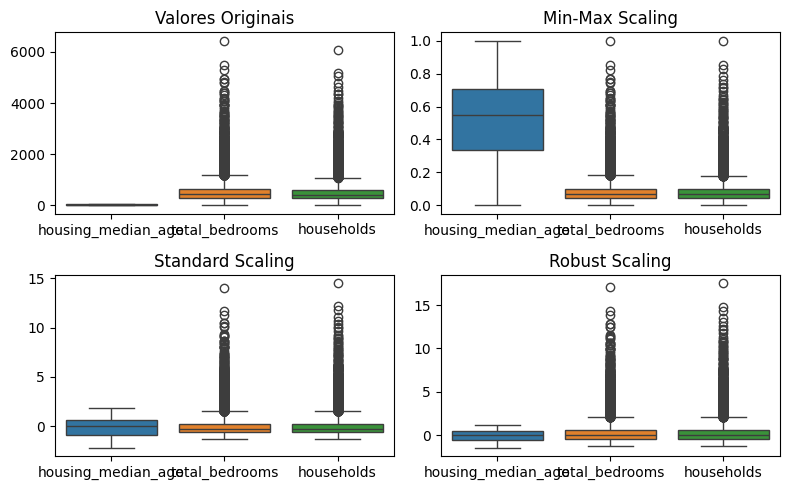

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(8,5))

# Boxplot dos valores originais
sns.boxplot(data=df[['housing_median_age', 'total_bedrooms', 'households']], ax=axes[0, 0])
axes[0, 0].set_title('Valores Originais')

# Boxplot dos valores após Min-Max Scaling
sns.boxplot(data=df_min_max, ax=axes[0, 1])
axes[0, 1].set_title('Min-Max Scaling')

# Boxplot dos valores após Standard Scaling
sns.boxplot(data=df_scale, ax=axes[1, 0])
axes[1, 0].set_title('Standard Scaling')

# Boxplot dos valores após Robust Scaling
sns.boxplot(data=df_robust, ax=axes[1, 1])
axes[1, 1].set_title('Robust Scaling')

plt.tight_layout()
plt.show()


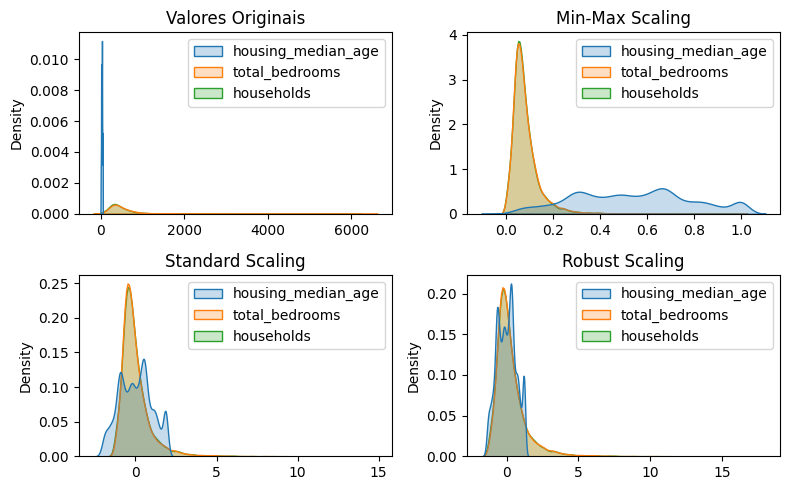

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(8,5))

# Densidade dos valores originais
sns.kdeplot(data=df[['housing_median_age', 'total_bedrooms', 'households']], ax=axes[0, 0], fill=True)
axes[0, 0].set_title('Valores Originais')

# Densidade dos valores após Min-Max Scaling
sns.kdeplot(data=df_min_max, ax=axes[0, 1], fill=True)
axes[0, 1].set_title('Min-Max Scaling')

# Densidade dos valores após Standard Scaling
sns.kdeplot(data=df_scale, ax=axes[1, 0], fill=True)
axes[1, 0].set_title('Standard Scaling')

# Densidade dos valores após Robust Scaling
sns.kdeplot(data=df_robust, ax=axes[1, 1], fill=True)
axes[1, 1].set_title('Robust Scaling')

plt.tight_layout()
plt.show()


# Quando e qual normalização empregar?

> **Preciso normalizar?**
> 1. Quanto menos interferirmos (quanto menos *botamos a mão*) nos dados, melhor
> 2. Nem todos algoritmos empregam os valores e/ou distância e, portanto, a normalização pode não ser necessária
> 3. A preparação dos dados pode envolver outras etapas que podem influenciar no tipo de normalização, como a exclusão de outliers

> **Decidi por normalizar. Que algoritmo empregar?**
> 1. Nenhum algoritmo é *melhor* a priori (ou só teríamos um :-))
> 2. Dependem de muitos fatores como dos dados (outliers, distribuição, valores mínimos e máximos etc.), do modelo de aprendizado e tarefa a ser realizado, função distância empregada etc. também não há uma concordância dos autores sobre técnicas de normalização e modelos a empregar. O melhor, portanto, é experimentar os diferentes métodos e resultados.

De qualquer modo, o Min-Max Scaling é útil para algoritmos sensíveis à escala dos dados e que empregam distância. O Standard Scaling é mais adequado para algoritmos que assumem uma distribuição normal dos dados. Mas ambos são bastante sensíveis a outliers. O Robust Scaling é ideal quando há muitos outliers nos dados, e o Normalizer é mais comum em tarefas de aprendizado não supervisionado, como clustering.

## Na prática

Na prática, os métodos mais comuns empregados são o **Min-Max Scaling** e o **Standard Scaling**.

# Aplicando Estimadores de Normalização

In [28]:
df_encoded.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_Male
0,Adelie,39.1,18.7,181.0,3750.0,0.0,1.0,1.0
1,Adelie,39.5,17.4,186.0,3800.0,0.0,1.0,0.0
2,Adelie,40.3,18.0,195.0,3250.0,0.0,1.0,0.0
3,Adelie,36.7,19.3,193.0,3450.0,0.0,1.0,0.0
4,Adelie,39.3,20.6,190.0,3650.0,0.0,1.0,1.0


In [35]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

standard_scaler = StandardScaler()

df_scaled = pd.DataFrame(standard_scaler.fit_transform(df_encoded.drop(columns='species')),
                         columns=df_encoded.drop(columns='species').columns)

df_scaled = pd.concat([df_encoded['species'], df_scaled], axis=1)
df_scaled.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_Male
0,Adelie,-0.896042,0.780732,-1.426752,-0.568475,-0.76532,2.466801,0.991031
1,Adelie,-0.822788,0.119584,-1.069474,-0.506286,-0.76532,2.466801,-1.009050
2,Adelie,-0.676280,0.424729,-0.426373,-1.190361,-0.76532,2.466801,-1.009050
3,Adelie,-1.335566,1.085877,-0.569284,-0.941606,-0.76532,2.466801,-1.009050
4,Adelie,-0.859415,1.747026,-0.783651,-0.692852,-0.76532,2.466801,0.991031


In [ ]:
df_scaled.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_Male
count,3.330000e+02,3.330000e+02,3.330000e+02,3.330000e+02,3.330000e+02,3.330000e+02,3.330000e+02
mean,3.840772e-16,6.401286e-16,2.133762e-16,-1.707010e-16,1.066881e-16,-8.535048e-17,7.201447e-17
std,1.001505e+00,1.001505e+00,1.001505e+00,1.001505e+00,1.001505e+00,1.001505e+00,1.001505e+00
min,-2.177987e+00,-2.067291e+00,-2.069852e+00,-1.874435e+00,-7.653197e-01,-4.053834e-01,-1.009050e+00
25%,-8.227879e-01,-7.958519e-01,-7.836512e-01,-8.172292e-01,-7.653197e-01,-4.053834e-01,-1.009050e+00
50%,9.288742e-02,6.872642e-02,-2.834620e-01,-1.953432e-01,-7.653197e-01,-4.053834e-01,9.910312e-01
75%,8.437412e-01,7.807321e-01,8.598276e-01,7.063915e-01,1.306643e+00,-4.053834e-01,9.910312e-01
max,2.858227e+00,2.204743e+00,2.146028e+00,2.603144e+00,1.306643e+00,2.466801e+00,9.910312e-01


### Classificação

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

X = df_scaled.drop(columns=['species'])
y = df_scaled['species']

# model = LogisticRegression(max_iter=10000)
model = KNeighborsClassifier()

model.fit(X, y)

print("Score (Accurancy): ", model.score(X, y))

Score (Accurancy):  0.996996996996997


In [37]:
X_new = df_scaled.iloc[[5,9]].drop(columns=['species']) # Tente df_encoded, estaria correto???
display(X_new.head())
print()
print('Predictions: ', model.predict(X_new))

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_Male
5,-0.932669,0.323014,-1.426752,-0.723946,-0.76532,2.466801,-1.009050
9,-1.720150,2.001313,-0.212006,0.239977,-0.76532,2.466801,0.991031



Predictions:  ['Adelie' 'Adelie']


### Linear Regression

In [38]:
X = df_scaled.drop(columns=['body_mass_g','species'])
y = df_scaled['body_mass_g']

model = LinearRegression()
model.fit(X, y)

print("Score (R2): ", model.score(X, y))

Score (R2):  0.8392957568284216


In [ ]:
X_new = df_encoded.iloc[[5,9]].drop(columns=['body_mass_g','species'])
display(X_new.head())
print()
print('Predictions: ', model.predict(X_new))

,bill_length_mm,bill_depth_mm,flipper_length_mm,island_Dream,island_Torgersen,sex_Male
5,38.9,17.8,181.0,0.0,1.0,0.0
9,34.6,21.1,198.0,0.0,1.0,1.0



Predictions:  [106.23700969 116.00149496]


### Inverse Transform!

In [ ]:
X_new['body_mass_g'] = model.predict(X_new)

X_new_unscaled = pd.DataFrame(standard_scaler.inverse_transform(X_new),
                         columns=X_new.columns)
X_new_unscaled.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,island_Dream,island_Torgersen,sex_Male,body_mass_g
0,256.404335,52.164585,2734.008531,4207.057057,0.852003,0.141141,53.620854
1,232.924396,58.653298,2971.918512,4207.057057,0.852003,0.489308,58.502898


**Exercício**. Crie dados novos para predição, aplique os estimadores de encode e normalização criados e então faça predição com os modelos.